# 模拟退火

最优解 x: -1.3061395147274186
最优值 f(x): -7.945822849532619


D:\Code\Python\MCM\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


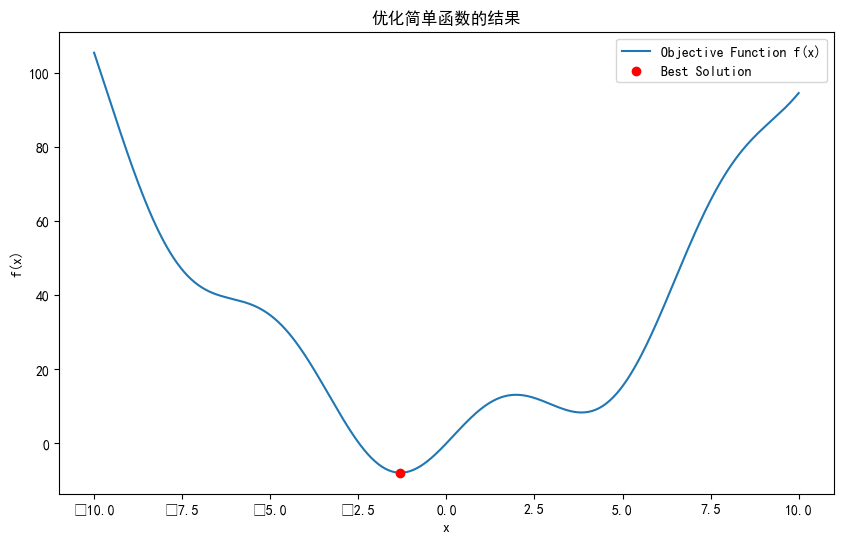

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为 SimHei（支持中文）
rcParams['font.family'] = 'SimHei'

def objective_function(x):
    """目标函数 f(x) = x^2 + 10*sin(x)"""
    return x**2 + 10 * np.sin(x)

def simulated_annealing(obj_func, initial_temp=1000, cooling_rate=0.995, min_temp=1e-8, max_iter=10000):
    current_x = np.random.uniform(-10, 10)
    current_value = obj_func(current_x)

    best_x = current_x
    best_value = current_value

    temp = initial_temp

    for _ in range(max_iter):
        if temp < min_temp:
            break

        # 生成邻域解
        new_x = current_x + np.random.uniform(-1, 1)
        new_value = obj_func(new_x)

        # 接受准则
        if new_value < current_value or np.random.rand() < np.exp((current_value - new_value) / temp):
            current_x = new_x
            current_value = new_value

        if new_value < best_value:
            best_x = new_x
            best_value = new_value

        # 降温
        temp *= cooling_rate

    return best_x, best_value

# 执行模拟退火
best_x, best_value = simulated_annealing(objective_function)

# 输出结果
print("最优解 x:", best_x)
print("最优值 f(x):", best_value)

# 可视化结果
x = np.linspace(-10, 10, 400)
y = objective_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Objective Function f(x)')
plt.scatter(best_x, best_value, color='red', zorder=5, label='Best Solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('优化简单函数的结果')
plt.legend()
plt.show()


# 遗传算法

初始化：随机生成初始种群。
评估：计算每个个体的适应度（目标函数值）。
选择：根据适应度选择个体进行交叉和变异。
交叉：将选中的个体进行交叉操作，生成新的个体（子代）。
变异：对新个体进行变异操作，以增加种群的多样性。
替换：用新生成的个体替代旧种群中的一部分个体。
重复：重复步骤 2-6，直到满足终止条件（如达到最大代数或适应度达到预期）。

最优解 x: -1.153215581009757
最优值 f(x): -7.810821258583433


D:\Code\Python\MCM\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


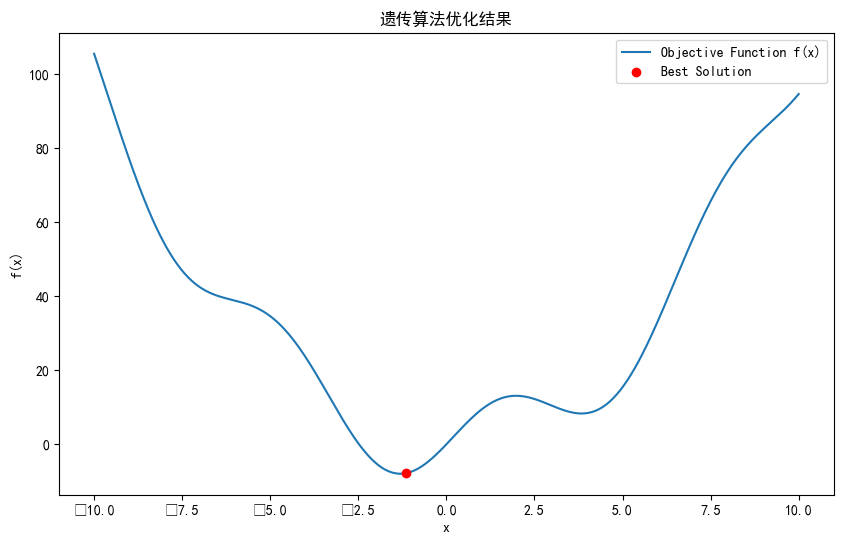

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为 SimHei（支持中文）
rcParams['font.family'] = 'SimHei'

def objective_function(x):
    """目标函数 f(x) = x^2 + 10*sin(x)"""
    return x**2 + 10 * np.sin(x)

def create_population(size, bounds):
    """初始化种群"""
    return np.random.uniform(bounds[0], bounds[1], size=(size, 1))

def evaluate_population(population):
    """计算每个个体的适应度"""
    return np.array([objective_function(individual[0]) for individual in population])

def select_parents(population, fitness, num_parents):
    """选择适应度最好的父母"""
    parents_indices = np.argsort(fitness)[:num_parents]
    return population[parents_indices]

def crossover(parents, offspring_size):
    """交叉操作生成子代"""
    offspring = np.empty((offspring_size, parents.shape[1]))

    # 确保交叉点选择范围有效
    num_features = parents.shape[1]
    if num_features > 1:
        crossover_point = np.random.randint(1, num_features)
    else:
        crossover_point = 0  # 对于一维个体，交叉点固定为0

    for k in range(offspring_size):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, :crossover_point] = parents[parent1_idx, :crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]

    return offspring

def mutate(offspring, mutation_rate, bounds):
    """对子代进行变异"""
    for i in range(offspring.shape[0]):
        if np.random.rand() < mutation_rate:
            mutation_value = np.random.uniform(bounds[0], bounds[1])
            offspring[i] = mutation_value
    return offspring

def genetic_algorithm(objective_func, population_size, num_generations, mutation_rate, bounds):
    """执行遗传算法"""
    population = create_population(population_size, bounds)
    best_solution = None
    best_fitness = float('inf')

    for generation in range(num_generations):
        fitness = evaluate_population(population)
        parents = select_parents(population, fitness, population_size // 2)
        offspring = crossover(parents, population_size - parents.shape[0])
        offspring = mutate(offspring, mutation_rate, bounds)
        population[:parents.shape[0]] = parents
        population[parents.shape[0]:] = offspring

        current_best_idx = np.argmin(fitness)
        current_best_solution = population[current_best_idx]
        current_best_fitness = fitness[current_best_idx]

        if current_best_fitness < best_fitness:
            best_solution = current_best_solution
            best_fitness = current_best_fitness

    return best_solution, best_fitness

# 参数设置
population_size = 20
num_generations = 50
mutation_rate = 0.1
bounds = (-10, 10)

# 执行遗传算法
best_solution, best_fitness = genetic_algorithm(objective_function, population_size, num_generations, mutation_rate, bounds)

# 输出结果
print("最优解 x:", best_solution[0])
print("最优值 f(x):", best_fitness)

# 可视化结果
x = np.linspace(-10, 10, 400)
y = objective_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Objective Function f(x)')
plt.scatter(best_solution, best_fitness, color='red', zorder=5, label='Best Solution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('遗传算法优化结果')
plt.legend()
plt.show()


# 蚁群算法

最佳路径: [4, np.int64(2), np.int64(0), np.int64(1), np.int64(3)]
最佳路径长度: 22.35103276995244


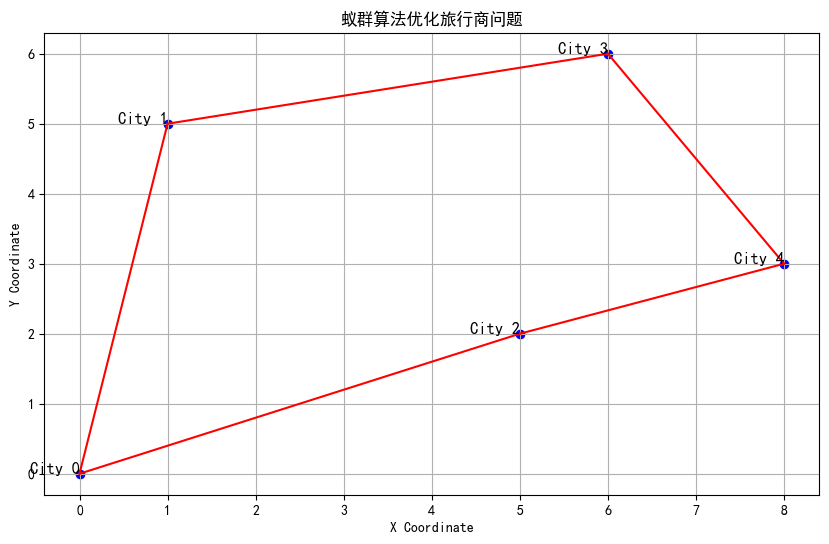

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def distance_matrix(coords):
    """计算城市之间的距离矩阵"""
    num_cities = len(coords)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            dist_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])
    return dist_matrix

def initialize_pheromones(num_cities):
    """初始化信息素矩阵"""
    return np.ones((num_cities, num_cities))

def update_pheromones(pheromones, best_tour, dist_matrix, evaporation_rate):
    """更新信息素矩阵"""
    num_cities = len(pheromones)
    pheromones *= (1 - evaporation_rate)
    for i in range(num_cities):
        j = (i + 1) % num_cities
        pheromones[best_tour[i], best_tour[j]] += 1 / dist_matrix[best_tour[i], best_tour[j]]
    return pheromones

def choose_next_city(pheromones, dist_matrix, current_city, visited_cities, alpha, beta):
    """选择下一个城市"""
    num_cities = len(pheromones)
    probabilities = np.zeros(num_cities)
    for i in range(num_cities):
        if i not in visited_cities:
            probabilities[i] = (pheromones[current_city, i] ** alpha) * ((1 / dist_matrix[current_city, i]) ** beta)
    probabilities /= probabilities.sum()
    return np.random.choice(range(num_cities), p=probabilities)

def ant_colony_optimization(coords, num_ants=10, num_iterations=100, alpha=1, beta=2, evaporation_rate=0.5):
    """蚁群算法求解旅行商问题"""
    num_cities = len(coords)
    dist_matrix = distance_matrix(coords)
    pheromones = initialize_pheromones(num_cities)

    best_tour = None
    best_tour_length = float('inf')

    for iteration in range(num_iterations):
        all_tours = []
        all_tour_lengths = []

        for _ in range(num_ants):
            tour = []
            visited_cities = set()
            current_city = np.random.randint(num_cities)
            tour.append(current_city)
            visited_cities.add(current_city)

            for _ in range(num_cities - 1):
                next_city = choose_next_city(pheromones, dist_matrix, current_city, visited_cities, alpha, beta)
                tour.append(next_city)
                visited_cities.add(next_city)
                current_city = next_city

            tour_length = sum(dist_matrix[tour[i], tour[(i + 1) % num_cities]] for i in range(num_cities))
            all_tours.append(tour)
            all_tour_lengths.append(tour_length)

            if tour_length < best_tour_length:
                best_tour = tour
                best_tour_length = tour_length

        pheromones = update_pheromones(pheromones, best_tour, dist_matrix, evaporation_rate)

        print(f"Iteration {iteration + 1}: Best Tour Length = {best_tour_length}")

    return best_tour, best_tour_length

# 城市坐标
coords = np.array([
    [0, 0], [1, 5], [5, 2], [6, 6], [8, 3]
])

# 执行蚁群算法
best_tour, best_tour_length = ant_colony_optimization(coords)

# 输出结果
print("最佳路径:", best_tour)
print("最佳路径长度:", best_tour_length)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(coords[:, 0], coords[:, 1], color='blue')
for i, (x, y) in enumerate(coords):
    plt.text(x, y, f'City {i}', fontsize=12, ha='right')
for i in range(len(best_tour)):
    plt.plot([coords[best_tour[i], 0], coords[best_tour[(i + 1) % len(best_tour)], 0]],
             [coords[best_tour[i], 1], coords[best_tour[(i + 1) % len(best_tour)], 1]],
             'r-')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('蚁群算法优化旅行商问题')
plt.grid(True)
plt.show()
